In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import pickle
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import pandas as pd
import matplotlib.pyplot as plt
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz, HalfNormal
import numpy as np
import arviz as az
import pymc3 as pm
from pymc3 import forestplot

import autosklearn.regression

RANKING_COMPOSE = {
    10:1,
    13:2,
    19:3,
    15:4,
    18:5,
    5:6,
    17:7,
    2:8,
    9:9,
    12:10,
    16:11,
    20:12,
    7:13,
    8:14,
    11:15,
    1:16,
    14:17,
    6:18,
    3:19,
    4:20
    
}

RANKING_COMPOSE_DOCS = {
    5:1,
    10:2,
    19:3,
    15:4,
    9:5,
    18:6,
    8:7,
    13:8,
    17:9,
    2:10,
    1:11,
    12:12,
    16:13,
    20:14,
    7:15,
    6:16,
    14:17,
    11:18,
    3:19,
    4:20
}
RANKING ={
    '016':1,
    '002':2,
    '005':3,
    '008':4,
    '003':5,
    '019':6,
    '009':7,
    '010':8,
    '020':9,
    '006':10,
    '018':11,
    '013':12,
    '015':13,
    '007':14,
    '014':15,
    '017':16,
    '004':17,
    '011':18,
    '001':19,
    '012':25,
        }
RANKING_COMPOSE = {
    10:1,
    13:2,
    19:3,
    15:4,
    18:5,
    5:6,
    17:7,
    2:8,
    9:9,
    12:10,
    16:11,
    20:12,
    7:13,
    8:14,
    11:15,
    1:16,
    14:17,
    6:18,
    3:19,
    4:20
    
}

RANKING_COMPOSE_DOCS = {
    5:1,
    10:2,
    19:3,
    15:4,
    9:5,
    18:6,
    8:7,
    13:8,
    17:9,
    2:10,
    1:11,
    12:12,
    16:13,
    20:14,
    7:15,
    6:16,
    14:17,
    11:18,
    3:19,
    4:20
}
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [2]:
#varnames to be plotted in the hdi plot & feature column names from the feature dataset
varnames = ['beta0', 'beta1', 'beta2', 'beta3','sigma']
considered_features = [ 'breathing_rate', 'average_resting_heart_rate', 'glucose']

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [ν_, sigma, beta3, beta2, beta1, beta0]
INFO:pymc3:NUTS: [ν_, sigma, beta3, beta2, beta1, beta0]


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 151 seconds.
INFO:pymc3:Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 151 seconds.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Computed from 20000 by 5649 log-likelihood matrix

          Estimate       SE
elpd_waic -17215.70    36.60
p_waic        6.92        -

The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.


INFO:numba.transforms:finding looplift candidates
/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<Figure size 432x1008 with 0 Axes>

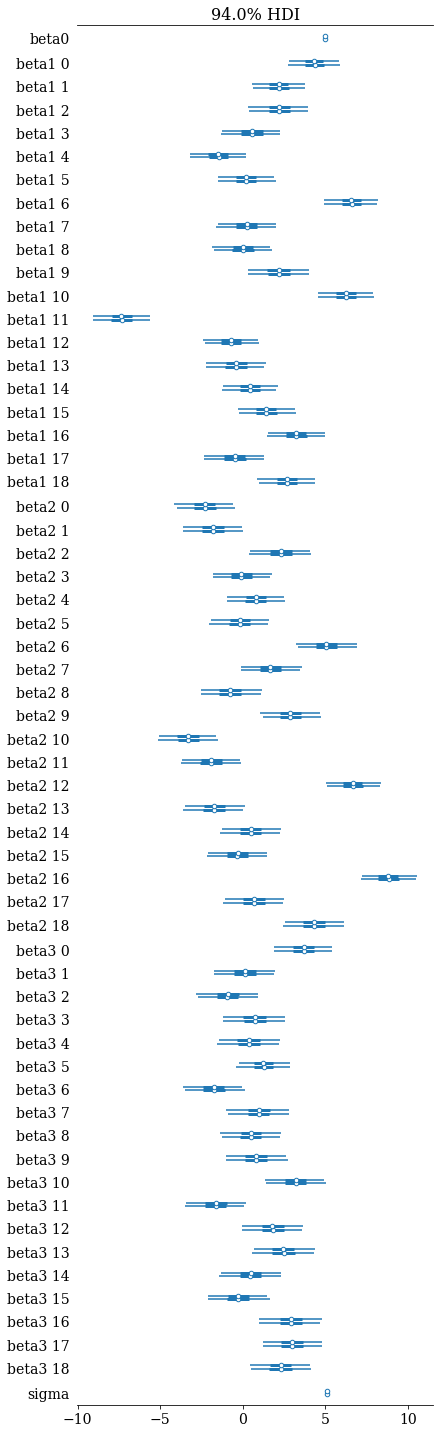

NameError: name 'run_pooled_model' is not defined

In [31]:
#save model traces to variables for later inspection
unpooled_model_trace = run_unpooled_model()
pooled_model_trace = run_pooled_model()
hierarchical_model_trace = run_initiate_hierarchical_model()

In [15]:
print(az.waic(unpooled_trace, scale ='deviance'))
print(az.waic(pooled_trace, scale ='deviance'))
print(az.waic(hierarchical_trace, scale ='deviance'))



Computed from 40000 by 5649 log-likelihood matrix

              Estimate       SE
deviance_waic 35087.61    70.94
p_waic            3.34        -

The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.
Computed from 20000 by 5649 log-likelihood matrix

              Estimate       SE
deviance_waic 34431.15    73.19
p_waic            6.82        -

The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.
Computed from 20000 by 5649 log-likelihood matrix

              Estimate       SE
deviance_waic 30593.77   192.20
p_waic          305.52        -

There has been a warning during the calculation. Please check the results.

The scale is now log by default. Use 'scale' argument or 'stats.ic

/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:1415: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


In [46]:
#pm.trace_to_dataframe(unpooled_trace)
pooled_trace_params = pm.trace_to_dataframe(pooled_trace).mean()
pooled_trace_params_fixed = pooled_trace_params[[0,58]]
pooled_trace_params = pooled_trace_params.drop(labels=['beta0', 'sigma','ν_','ν'])
pooled_trace_params = [[pooled_trace_params[i], pooled_trace_params[i+19], pooled_trace_params[i+38]]for i in range(round(len(pooled_trace_params)/3))]
pooled_trace_params

ranking = pd.DataFrame()
normalized_features = pd.DataFrame()
normalized_features['feat1'] = overall_data[considered_features[0]] 
normalized_features['feat2'] = overall_data[considered_features[1]] 
normalized_features['feat3'] = overall_data[considered_features[2]] 
normalized_features['ranking'] = overall_data['ranking']
for i,sub_data in enumerate(normalized_features.groupby('ranking', sort=False)):
    sub_norm_mean = sub_data[1].mean()
    ranking = ranking.append({'Estimate': pooled_trace_params_fixed[0]+
                             sub_norm_mean[0]*pooled_trace_params[i][0] +
                             sub_norm_mean[1]*pooled_trace_params[i][1] +
                             sub_norm_mean[2]*pooled_trace_params[i][2] +
                             pooled_trace_params_fixed[1]},
                             ignore_index=True)
print('Correlation between pooled model and ranking: ', np.argsort(ranking['Estimate']).corr(pd.Series(valid_data.ranking.unique())))

IndexError: index 58 is out of bounds for axis 0 with size 7

In [47]:
#calculating the correlation between the professionals' ranking and the ranking as estimated by the model.
#this is done via argsort. The output of the argsort algorithm are arrays with numbers that represent the index of 
# the values would the array be ordered, e.g. argsort output: [1, 0, 2] --> the first elements value ranks second, 
# the second one first and the third one ranks third. The parameters for the different groups are based on
# the order of the overall_data.ranking.unique(), which does not return an ordered array, but rather sth. like [16,5,4...]
# just the structure the data is saved in. Therefore it is sufficient to test the correlation with the output of the 
# overall_data.unique() output
hierarchical_trace_params = pm.trace_to_dataframe(hierarchical_trace)
hierarchical_trace_params_fixed = hierarchical_trace_params.iloc[:,[0,58]].mean()
hierarchical_trace_params = hierarchical_trace_params.iloc[:,5:62].mean()
hierarchical_trace_params = [[hierarchical_trace_params[i],
                              hierarchical_trace_params[i+19],
                              hierarchical_trace_params[i+38]]for i in range(round(len(hierarchical_trace_params)/3))]


ranking = pd.DataFrame()
normalized_features = pd.DataFrame()
normalized_features['feat1'] = overall_data[considered_features[0]] 
normalized_features['feat2'] = overall_data[considered_features[1]] 
normalized_features['feat3'] = overall_data[considered_features[2]] 
normalized_features['ranking'] = overall_data['ranking']
for i,sub_data in enumerate(normalized_features.groupby('ranking', sort=False)):
    sub_norm_mean = sub_data[1].mean()
    ranking = ranking.append({'Estimate': hierarchical_trace_params_fixed[0]+
                             sub_norm_mean[0]*hierarchical_trace_params[i][0] +
                             sub_norm_mean[1]*hierarchical_trace_params[i][1] +
                             sub_norm_mean[2]*hierarchical_trace_params[i][2] +
                             hierarchical_trace_params_fixed[1]},
                             ignore_index=True)
print('Correlation between hierarchical model and ranking: ', np.argsort(ranking['Estimate']).corr(pd.Series(valid_data.ranking.unique()), method ='spearman'))

NameError: name 'hierarchical_trace' is not defined

## Inspection of data

In [11]:
from pylab import rcParams

##%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999
#overall_data.iloc[:,[3,8,9,10,11,12,13,14,15,16]]
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
overall_data.columns[18]

'average_heart_rate_by_activity_intensity'

In [5]:
def normalize(series):
    return (series-series.mean())/(series.max()-series.min())

In [151]:
(np.linspace(0,1,19)*19).astype(int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19])

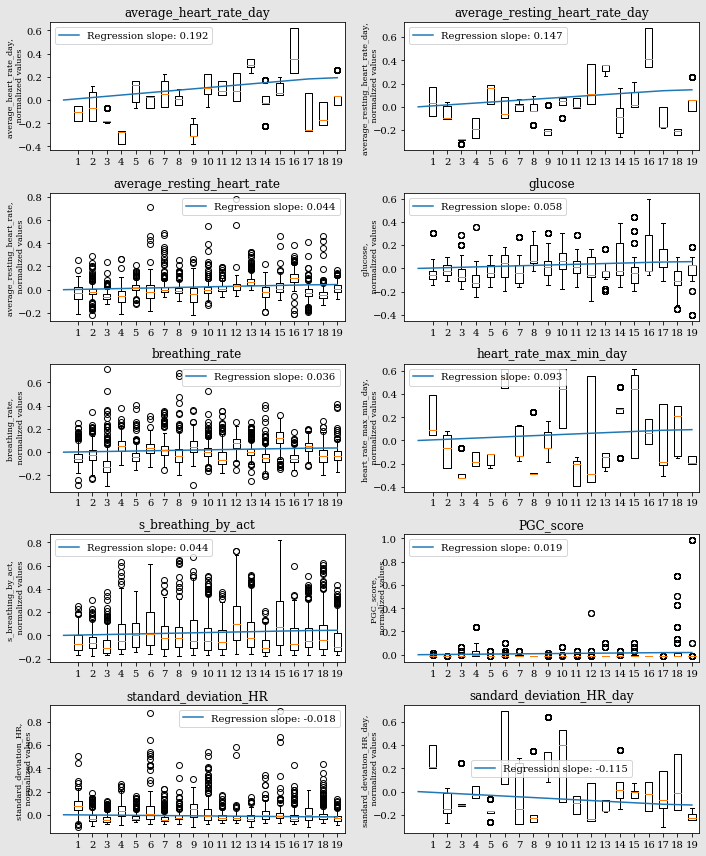

In [173]:
#inpect a boxplot of each feature extracted from the dataset
fig , ax = plt.subplots(5,2, figsize = (10,12))
ax = np.ravel(ax)

for i, col in enumerate(overall_data.columns[[9,11,10,21,3,13,8,18,16,15]].dropna()):
    plot_df = normalize(overall_data[['ranking', col]].dropna())
    ax[i].boxplot([sub[1][col] for sub in plot_df.groupby('ranking')])
    b, m = polyfit(plot_df.ranking, plot_df[col], 1)
    dots = np.linspace(0,1,19)
    ax[i].plot((dots*19).astype(int), b + m * dots, '-', label =(f'Regression slope: {round(m,3)}'))
    ax[i].legend()
    ax[i].set_ylabel(f'{col}, \n normalized values', labelpad=11, **{ "verticalalignment":"top", "fontsize":"9"})

    ax[i].set_title(str(col))
fig.set_facecolor('.9')
fig.tight_layout()    


<style>
.text_cell_render {
font-family: Times New Roman, serif;
}
</style>

In [191]:
overall_data.iloc[:,[9,11,10,21,3,13,8,18,16,15,24]].cov()

,average_heart_rate_day,average_resting_heart_rate_day,average_resting_heart_rate,glucose,breathing_rate,heart_rate_max_min_day,s_breathing_by_act,PGC_score,standard_deviation_HR,sandard_deviation_HR_day,ranking
average_heart_rate_day,84.204466,62.073009,73.315121,1.147169,-1.293409,74.916237,114.007256,-21.207861,-8.957283,-1.249094,15.694299
average_resting_heart_rate_day,62.073009,59.692998,61.405274,0.932620,1.019420,30.955445,249.412921,-19.751810,-4.413254,-6.245187,10.134469
average_resting_heart_rate,73.315121,61.405274,200.486696,0.929418,5.761454,36.784451,-258.726186,-30.190686,4.291925,-7.015171,14.487800
glucose,1.147169,0.932620,0.929418,0.602027,0.018149,1.097917,33.259897,-6.761263,-0.395425,0.034202,0.579544
breathing_rate,-1.293409,1.019420,5.761454,0.018149,14.912261,22.718158,294.597667,-1.171123,4.404970,1.881259,2.543866
heart_rate_max_min_day,74.916237,30.955445,36.784451,1.097917,22.718158,1567.151060,793.781772,9.008150,52.759119,165.594175,22.873746
s_breathing_by_act,114.007256,249.412921,-258.726186,33.259897,294.597667,793.781772,160567.985038,-158.900005,-811.895452,-122.326636,191.104714
PGC_score,-21.207861,-19.751810,-30.190686,-6.761263,-1.171123,9.008150,-158.900005,510.766582,2.557946,0.049731,10.432569
standard_deviation_HR,-8.957283,-4.413254,4.291925,-0.395425,4.404970,52.759119,-811.895452,2.557946,35.346572,11.621020,-2.649905
sandard_deviation_HR_day,-1.249094,-6.245187,-7.015171,0.034202,1.881259,165.594175,-122.326636,0.049731,11.621020,34.993310,-5.319237


In [88]:
y = pd.DataFrame()
y = y.append([[col, overall_data[col].corr(overall_data.iloc[:,24], method='pearson')] for col in overall_data.iloc[:,3:23].columns])
y.columns = ['Feature', 'Correlation']
y.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

,Feature,Correlation
0,average_heart_rate_day,0.307822
1,average_resting_heart_rate_day,0.236083
2,average_resting_heart_rate,0.184155
3,glucose,0.134412
4,breathing_rate,0.118588
5,heart_rate_max_min_day,0.103994
6,s_breathing_by_act,0.085854
7,PGC_score,0.083069
8,standard_deviation_of_the_interbeat_interval,0.067124
9,proportion_low_activity_above_resting_HR,0.050385


## Selection of features and transformation thereof

## Estimation of an order based on linear regression model 


In [26]:

def normalize(series):
    return (series-series.mean())/(series.max()-series.min())


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [ν_, sigma, beta3, beta2, beta1, beta0]
INFO:pymc3:NUTS: [ν_, sigma, beta3, beta2, beta1, beta0]


Sampling 2 chains for 2_000 tune and 20_000 draw iterations (4_000 + 40_000 draws total) took 96 seconds.
INFO:pymc3:Sampling 2 chains for 2_000 tune and 20_000 draw iterations (4_000 + 40_000 draws total) took 96 seconds.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
INFO:numba.transforms:finding looplift candidates
/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<Figure size 432x1008 with 0 Axes>

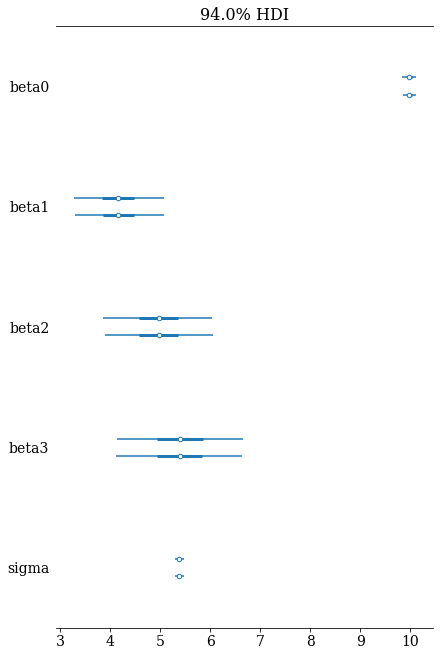

/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Computed from 40000 by 5649 log-likelihood matrix

          Estimate       SE
elpd_waic -17544.06    35.54
p_waic        3.36        -

The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.


In [38]:

#def run_pooled_model(df):
data = pd.read_csv('overall_summaryV2.1.csv', dtype = {'subject_id':'category' }).dropna()
data.dtypes

valid_data = data.iloc[:,[3,10,21,24]].dropna()
valid_data.columns


valid_data = data.iloc[:,[3,10,21,24]].dropna()

id_lookup = dict(zip(valid_data.ranking.unique(), range(len(valid_data.ranking.unique()))))
valid_data_2 = valid_data.ranking.replace(id_lookup).values

n_subjects = len(valid_data.ranking.unique())
rank = valid_data.ranking
breathing_rate = normalize(valid_data.breathing_rate)
average_resting_heart_rate = normalize(valid_data.average_resting_heart_rate)
glucose = normalize(valid_data.glucose)

with Model() as pooled_model:

    beta0 = Normal('beta0', sigma=1)
    beta1 = Normal('beta1', 0.5, sigma=1)
    beta2 = Normal('beta2', 0.5, sigma=1)
    beta3 = Normal('beta3', 0.5, sigma=1)

    sigma = HalfNormal('sigma', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1)
    y_pred = pm.StudentT('y_pred', mu= beta0 + beta1*glucose + beta2*breathing_rate+beta3*average_resting_heart_rate,
        sd=sigma, nu=ν, observed=rank)

    pooled_trace = sample(20000, tune=2000)
    pm.model_to_graphviz() 

plt.figure(figsize=(6,14))


varnames = ['beta0', 'beta1', 'beta2', 'beta3','sigma']

forestplot(pooled_trace, var_names=varnames)
az.summary(pooled_trace, var_names = varnames)
plt.show()

print(az.waic(pooled_trace))
    #return pooled_trace




In [50]:
unpooled_trace_params = pm.trace_to_dataframe(pooled_trace).mean()
unpooled_trace_params_fixed = unpooled_trace_params[[0,4]]
unpooled_trace_params = unpooled_trace_params.drop(labels=['beta0', 'sigma','ν_','ν'])
unpooled_trace_params = [unpooled_trace_params[1], unpooled_trace_params[2], unpooled_trace_params[3]]


ranking = pd.DataFrame()
normalized_features = pd.DataFrame()
normalized_features['feat1'] = overall_data[considered_features[0]] 
normalized_features['feat2'] = overall_data[considered_features[1]] 
normalized_features['feat3'] = overall_data[considered_features[2]] 
normalized_features['ranking'] = overall_data['ranking']
for _,sub_data in normalized_features.groupby('ranking', sort=False):
    sub_norm_mean = sub_data.mean()
    ranking = ranking.append({'Estimate': unpooled_trace_params_fixed[0]+
                             sub_norm_mean[0]*unpooled_trace_params[0] +
                             sub_norm_mean[1]*unpooled_trace_params[1] +
                             sub_norm_mean[2]*unpooled_trace_params[2] +
                             unpooled_trace_params_fixed[1]},
                             ignore_index=True)
print('Correlation between unpooled model and ranking: ', np.argsort(ranking['Estimate']).corr(pd.Series(RANKING_COMPOSE_DOCS.keys())))

IndexError: index out of bounds

In [42]:
#az.summary(pooled_trace, var_names = varnames)
pm.model_to_graphviz(unpaired_model)

NameError: name 'unpaired_model' is not defined

In [117]:
valid_data =
id_lookup = dict(zip(valid_data.ranking.unique(), range(len(valid_data.ranking.unique()))))
valid_data_2 = valid_data.ranking.replace(id_lookup).values

NameError: name 'observed_data' is not defined

In [49]:
def run_unpooled_model():
    data = pd.read_csv('overall_summaryV2.1.csv', dtype = {'subject_id':'category' }).dropna()

    valid_data = data.iloc[:,[3,10,21,24]].dropna()
    valid_data.columns


    valid_data = data.iloc[:,[3,10,21,24]].dropna()

    id_lookup = dict(zip(valid_data.ranking.unique(), range(len(valid_data.ranking.unique()))))
    valid_data_2 = valid_data.ranking.replace(id_lookup).values

    n_subjects = len(valid_data.ranking.unique())
    rank = [RANKING_COMPOSE_DOCS[i]for i in valid_data.ranking['ranking']]
    breathing_rate = normalize(valid_data.breathing_rate)
    average_resting_heart_rate = normalize(valid_data.average_resting_heart_rate)
    glucose = normalize(valid_data.glucose)

    with Model() as unpooled_model:

        beta0 = Normal('beta0', sigma=1)
        beta1 = Normal('beta1', 0.5, sigma=1, shape=n_subjects)
        beta2 = Normal('beta2', 0.5, sigma=1, shape=n_subjects)
        beta3 = Normal('beta3', 0.5, sigma=1, shape=n_subjects)
        sigma = HalfNormal('sigma', 5)
        ν_ = pm.Exponential('ν_', 1/29)
        ν = pm.Deterministic('ν', ν_ + 1)
        y_pred = pm.StudentT('y_pred', mu=beta0 + beta0 + beta1[valid_data_2]*glucose + beta2[valid_data_2]*breathing_rate+beta3[valid_data_2]*average_resting_heart_rate,
            sd=sigma, nu=ν, observed=rank)


        unpooled_trace = sample(10000, tune=2000)
        model_to_graphviz(unpooled_model)


    print(az.waic(unpooled_trace))
    plt.figure(figsize=(6,14))
    
    varnames = ['beta0', 'beta1', 'beta2', 'beta3','sigma']

    forestplot(unpooled_trace, var_names=varnames)
    az.summary(unpooled_trace, var_names = varnames)
    plt.show()
    return unpooled_trace


data = pd.read_csv('overall_summaryV2.1.csv', dtype = {'subject_id':'category' }).dropna()

valid_data = data.iloc[:,[3,10,21,24]].dropna()
valid_data.columns


valid_data = data.iloc[:,[3,10,21,24]].dropna()

id_lookup = dict(zip(valid_data.ranking.unique(), range(len(valid_data.ranking.unique()))))
valid_data_2 = valid_data.ranking.replace(id_lookup).values

n_subjects = len(valid_data.ranking.unique())
rank = [RANKING_COMPOSE_DOCS[i]for i in valid_data.ranking]
breathing_rate = normalize(valid_data.breathing_rate)
average_resting_heart_rate = normalize(valid_data.average_resting_heart_rate)
glucose = normalize(valid_data.glucose)

with Model() as unpooled_model:

    beta0 = Normal('beta0', sigma=1)
    beta1 = Normal('beta1', 0.5, sigma=1, shape=n_subjects)
    beta2 = Normal('beta2', 0.5, sigma=1, shape=n_subjects)
    beta3 = Normal('beta3', 0.5, sigma=1, shape=n_subjects)
    sigma = HalfNormal('sigma', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1)
    y_pred = pm.StudentT('y_pred', mu=beta0 + beta0 + beta1[valid_data_2]*glucose + beta2[valid_data_2]*breathing_rate+beta3[valid_data_2]*average_resting_heart_rate,
        sd=sigma, nu=ν, observed=rank)
    trace = sample(1000)
    pm.model_to_graphviz(unpooled_model)    



Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [ν_, sigma, beta3, beta2, beta1, beta0]
INFO:pymc3:NUTS: [ν_, sigma, beta3, beta2, beta1, beta0]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 55 seconds.
INFO:pymc3:Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 55 seconds.


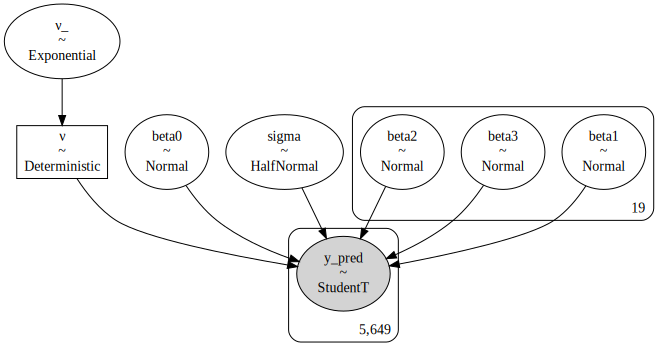

In [44]:
pm.model_to_graphviz(unpooled_model) 

In [51]:


# Model with varying intercept & slope
def run_hierarchical_model():
    data = pd.read_csv('overall_summaryV2.1.csv', dtype = {'subject_id':'category' }).dropna()

    valid_data = data.iloc[:,[3,10,21,24]].dropna()


    id_lookup = dict(zip(valid_data.ranking.unique(), range(len(valid_data.ranking.unique()))))
    valid_data_2 = valid_data.ranking.replace(id_lookup).values

    n_subjects = len(valid_data.ranking.unique())
    rank = valid_data.ranking
    breathing_rate = normalize(valid_data.breathing_rate)
    average_resting_heart_rate = normalize(valid_data.average_resting_heart_rate)
    glucose = normalize(valid_data.glucose)

    with Model() as hierarchical_model:

        b0_mu = Normal('b0_mu', mu = 0, sd = 0.1)
        b1_mu = Normal('b1_mu', mu = 0, sd = 0.1)
        b2_mu = Normal('b2_mu', mu = 0, sd = 0.1)
        b3_mu = Normal('b3_mu', mu = -1, sd = 0.1)
        b0_sigma = HalfNormal('b0_sigma', 10)
        b1_sigma = HalfNormal('b1_sigma', 10)
        b2_sigma = HalfNormal('b2_sigma', 10)
        b3_sigma = HalfNormal('b3_sigma', 10)

        beta0 = Normal('beta0', b0_mu, sigma=b0_sigma)
        beta1 = Normal('beta1', b1_mu, sigma=b1_sigma, shape=n_subjects)
        beta2 = Normal('beta2', b2_mu, sigma=b2_sigma, shape=n_subjects)
        beta3 = Normal('beta3', b3_mu, sigma=b3_sigma, shape=n_subjects)

        sigma = HalfNormal('sigma', 5)
        ν_ = pm.Exponential('ν_', 1/29)
        ν = pm.Deterministic('ν', ν_ + 1)
        y_pred = pm.StudentT('y_pred', mu=beta0 + beta1[valid_data_2]*glucose + beta2[valid_data_2]*breathing_rate+beta3[valid_data_2]*average_resting_heart_rate,
            sd=sigma, nu=ν, observed=rank)

        hierarchical_model_trace = sample(10000, tune=2000)
    #model_to_graphviz(unpooled_model)

    varnames = ['beta0', 'beta1', 'beta2', 'beta3','sigma']
    az.summary(hierarchical_model_trace, var_names = varnames)
    plt.figure(figsize=(6,14))



    forestplot(hierarchical_model_trace, var_names=varnames)
    print(az.waic(hierarchical_model_trace))
    return hierarchical_model_trace

def initiate_hierarchical_model():
    data = pd.read_csv('overall_summaryV2.1.csv', dtype = {'subject_id':'category' })

    valid_data = data.iloc[:,[3,10,21,24]].dropna()


    id_lookup = dict(zip(valid_data.ranking.unique(), range(len(valid_data.ranking.unique()))))
    valid_data_2 = valid_data.ranking.replace(id_lookup).values

    n_subjects = len(valid_data.ranking.unique())
    rank = [RANKING_COMPOSE_DOCS[i]for i in valid_data.ranking]
    breathing_rate = normalize(valid_data.breathing_rate)
    average_resting_heart_rate = normalize(valid_data.average_resting_heart_rate)
    glucose = normalize(valid_data.glucose)

    with Model() as hierarchical_model:

        b0_mu = Normal('b0_mu', mu = 0, sd = 0.1)
        b1_mu = Normal('b1_mu', mu = 0, sd = 0.1)
        b2_mu = Normal('b2_mu', mu = 0, sd = 0.1)
        b3_mu = Normal('b3_mu', mu = -1, sd = 0.1)
        b0_sigma = HalfNormal('b0_sigma', 10)
        b1_sigma = HalfNormal('b1_sigma', 10)
        b2_sigma = HalfNormal('b2_sigma', 10)
        b3_sigma = HalfNormal('b3_sigma', 10)

        beta0 = Normal('beta0', b0_mu, sigma=b0_sigma)
        beta1 = Normal('beta1', b1_mu, sigma=b1_sigma, shape=n_subjects)
        beta2 = Normal('beta2', b2_mu, sigma=b2_sigma, shape=n_subjects)
        beta3 = Normal('beta3', b3_mu, sigma=b3_sigma, shape=n_subjects)

        sigma = HalfNormal('sigma', 5)
        ν_ = pm.Exponential('ν_', 1/29)
        ν = pm.Deterministic('ν', ν_ + 1)
        y_pred = pm.StudentT('y_pred', mu=beta0 + beta1[valid_data_2]*glucose + beta2[valid_data_2]*breathing_rate+beta3[valid_data_2]*average_resting_heart_rate,
            sd=sigma, nu=ν, observed=rank)
    return hierarchical_model

In [52]:
    data = pd.read_csv('overall_summaryV2.1.csv', dtype = {'subject_id':'category' }).dropna()

    valid_data = data.iloc[:,[3,10,21,24]].dropna()


    id_lookup = dict(zip(valid_data.ranking.unique(), range(len(valid_data.ranking.unique()))))
    valid_data_2 = valid_data.ranking.replace(id_lookup).values

    n_subjects = len(valid_data.ranking.unique())
    rank = [RANKING_COMPOSE_DOCS[i]for i in valid_data.ranking]
    breathing_rate = normalize(valid_data.breathing_rate)
    average_resting_heart_rate = normalize(valid_data.average_resting_heart_rate)
    glucose = normalize(valid_data.glucose)

    with Model() as hierarchical_model:

        b0_mu = Normal('b0_mu', mu = 0, sd = 0.1)
        b1_mu = Normal('b1_mu', mu = 0, sd = 0.1)
        b2_mu = Normal('b2_mu', mu = 0, sd = 0.1)
        b3_mu = Normal('b3_mu', mu = -1, sd = 0.1)
        b0_sigma = HalfNormal('b0_sigma', 10)
        b1_sigma = HalfNormal('b1_sigma', 10)
        b2_sigma = HalfNormal('b2_sigma', 10)
        b3_sigma = HalfNormal('b3_sigma', 10)

        beta0 = Normal('beta0', b0_mu, sigma=b0_sigma)
        beta1 = Normal('beta1', b1_mu, sigma=b1_sigma, shape=n_subjects)
        beta2 = Normal('beta2', b2_mu, sigma=b2_sigma, shape=n_subjects)
        beta3 = Normal('beta3', b3_mu, sigma=b3_sigma, shape=n_subjects)

        sigma = HalfNormal('sigma', 5)
        ν_ = pm.Exponential('ν_', 1/29)
        ν = pm.Deterministic('ν', ν_ + 1)
        y_pred = pm.StudentT('y_pred', mu=beta0 + beta1[valid_data_2]*glucose + beta2[valid_data_2]*breathing_rate+beta3[valid_data_2]*average_resting_heart_rate,
            sd=sigma, nu=ν, observed=rank)
        trace = sample(1000)
        pm.model_to_graphviz()


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [ν_, sigma, beta3, beta2, beta1, beta0, b3_sigma, b2_sigma, b1_sigma, b0_sigma, b3_mu, b2_mu, b1_mu, b0_mu]
INFO:pymc3:NUTS: [ν_, sigma, beta3, beta2, beta1, beta0, b3_sigma, b2_sigma, b1_sigma, b0_sigma, b3_mu, b2_mu, b1_mu, b0_mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 85 seconds.
INFO:pymc3:Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 85 seconds.


In [84]:
#pm.trace_to_dataframe(unpooled_trace)
hierarchical_trace_params = pm.trace_to_dataframe(trace)
hierarchical_trace_params_fixed = hierarchical_trace_params.iloc[:,[0,58]].mean()
hierarchical_trace_params = hierarchical_trace_params.iloc[:,5:62].mean()
hierarchical_trace_params = [[hierarchical_trace_params[i],
                              hierarchical_trace_params[i+19],
                              hierarchical_trace_params[i+38]]for i in range(round(len(hierarchical_trace_params)/3))]


ranking = pd.DataFrame()
normalized_features = pd.DataFrame()
normalized_features['feat1'] = overall_data[considered_features[0]] 
normalized_features['feat2'] = overall_data[considered_features[1]] 
normalized_features['feat3'] = overall_data[considered_features[2]] 
normalized_features['ranking'] = overall_data['ranking']
for i,sub_data in enumerate(normalized_features.groupby('ranking', sort=False)):
    sub_norm_mean = sub_data[1].mean()
    ranking = ranking.append({'Estimate': hierarchical_trace_params_fixed[0]+
                             sub_norm_mean[0]*hierarchical_trace_params[i][0] +
                             sub_norm_mean[1]*hierarchical_trace_params[i][1] +
                             sub_norm_mean[2]*hierarchical_trace_params[i][2] +
                             hierarchical_trace_params_fixed[1]},
                             ignore_index=True)
print('Correlation between hierarchical model and ranking: ', pd.Series(np.argsort(ranking['Estimate']))\
      .corr(x.unique(), method ='spearman'))

TypeError: unsupported type: <class 'numpy.ndarray'>

In [67]:
considered_features

['breathing_rate', 'average_resting_heart_rate', 'glucose']

In [68]:
overall_data = pd.read_csv('overall_summaryV2.1.csv', dtype = {'subject_id':'category' }).dropna()

In [83]:
x = pd.Series(list(RANKING_COMPOSE_DOCS.keys()))

/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
INFO:numba.transforms:finding looplift candidates
/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta0,9.372,0.086,9.210,9.531,0.001,0.000,25927.0,25927.0,25924.0,28648.0,1.0
beta1[0],2.570,0.643,1.354,3.765,0.002,0.002,75329.0,68985.0,75321.0,31767.0,1.0
beta1[1],7.409,1.032,5.448,9.331,0.004,0.003,61862.0,61700.0,61959.0,32496.0,1.0
beta1[2],14.047,1.833,10.520,17.422,0.007,0.005,65795.0,64602.0,65796.0,32056.0,1.0
beta1[3],1.231,1.111,-0.828,3.348,0.004,0.004,73576.0,35831.0,73872.0,28882.0,1.0
beta1[4],-6.978,0.840,-8.565,-5.383,0.004,0.003,40430.0,40205.0,40461.0,34321.0,1.0
beta1[5],-0.359,0.655,-1.588,0.859,0.002,0.003,75219.0,21792.0,75298.0,28721.0,1.0
beta1[6],12.219,1.143,10.039,14.341,0.004,0.003,65748.0,65748.0,65908.0,31875.0,1.0
beta1[7],-1.079,1.494,-3.926,1.658,0.006,0.006,58484.0,31566.0,58484.0,33769.0,1.0
beta1[8],0.062,1.604,-2.885,3.168,0.006,0.009,71276.0,17015.0,71448.0,31267.0,1.0


<Figure size 432x1008 with 0 Axes>

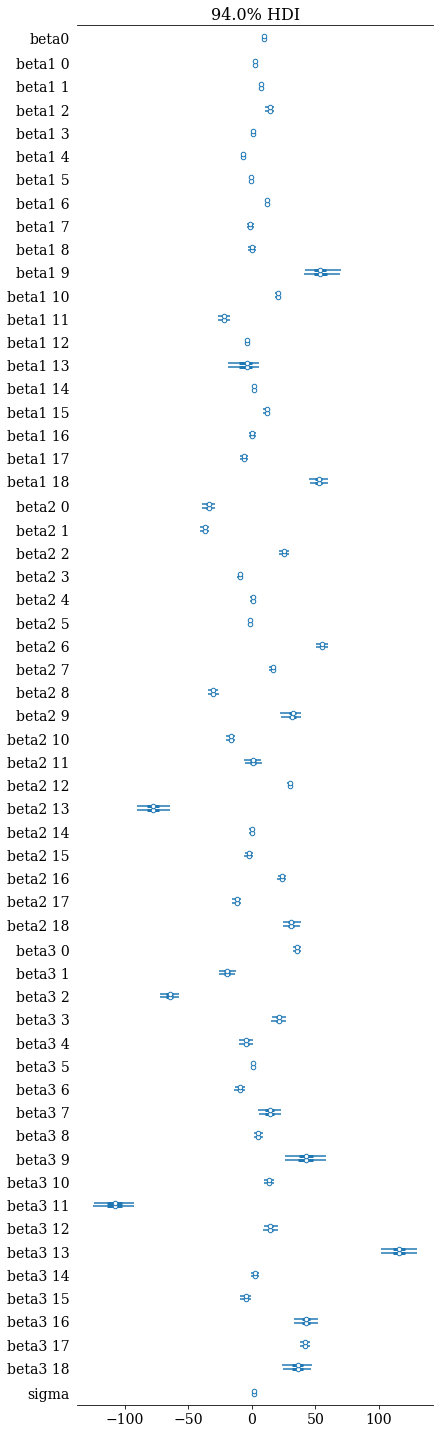

In [86]:
plt.figure(figsize=(6,14))


varnames = ['beta0', 'beta1', 'beta2', 'beta3','sigma']

forestplot(hierarchical_model_trace, var_names=varnames)
az.summary(hierarchical_model_trace, var_names = varnames)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz.data.io_pymc3 - WARNING - posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


NameError: name 'varying_intercept_trace' is not defined

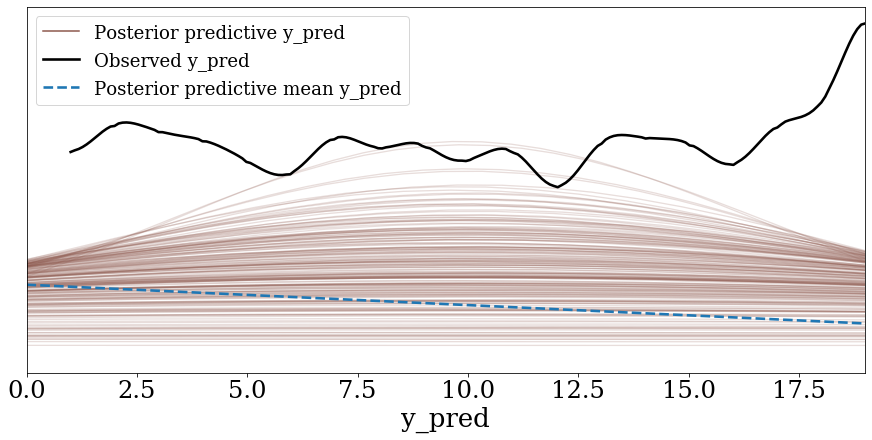

In [35]:
import pymc3 as pm
ppc = pm.sample_posterior_predictive(\
                                    trace = hierarchical_model_trace,
                                    samples = 200, 
                                    model = hierarchical_model)

data_ppc = az.from_pymc3(trace=hierarchical_model_trace, posterior_predictive=ppc)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=True)
plt.xlim(0, 19)

xvals = np.arange(2)
bp = varying_intercept_trace[a].mean(axis=0)
mp = varying_intercept_trace[b].mean()
for bi in bp:
    plt.plot(xvals, mp*xvals + bi, 'bo-', alpha=0.4)
plt.xlim(-0.1,1.1);

In [33]:
def compare_models():
    az.compare({ \
                'unpooled_model': unpooled_trace,
                'pooled_model': pooled_trace,
                'hierarchical_model': hierarchical_trace}, method='BB-pseudo-BMA')

In [ ]:
traces = []
waics = []
for coins, heads in [(30, 9), (300, 90)]:
    y_d = np.repeat([0, 1], [coins-heads, heads])
    for priors in [(4, 8), (8, 4)]:
with pm.Model() as model:
θ = pm.Beta('θ', *priors)
y = pm.Bernoulli('y', θ, observed=y_d)
trace = pm.sample(2000)
traces.append(trace)
waics.append(az.waic(trace))

In [5]:
considered_features = [ 'breathing_rate', 'average_resting_heart_rate', 'glucose']

In [53]:
#function used later on to extract the number of the record day to allow alignment between the recording days
def create_no_rec_dict(df):
    date_sub_dict = {}
    return_list = []
    
    #in this step a dictionary is filled that for each subject contains the number of consecutive recording 
    #based on the date. They no_record_day is the value and the key consists of the date and the subject's idea
    for  subject in [subjects[1] for subjects in df.groupby('subject_id')]:
        for indx,day  in enumerate(subject.sort_values(by='date').date.unique()):
            date_sub_dict[(day, subject.subject_id.iloc[0])] = indx +1 
    
    #in the second step, this dict is iterated over and a list is filled the recording day number for the length of
    #that this 
    for i in range(len(df)):
        return_list.append(date_sub_dict[(df.loc[i, 'date'], df.loc[(i, 'subject_id')])])
    return return_list


In [66]:
return_argsums_daily_level(overall_data)

ValueError: Length of values does not match length of index

#### Argsums for 10 minute features based on @list: considered_features 

In [44]:
def return_argsums_nonsummarized(df):
    """
    In this section the data will be transformed so that each row represents the selected features collected from each 
    individual at recording day & time x-
    The np.argsort function will be applied to each row, replacing each value with the index it would have if the row was 
    ordered from smallest to biggest. It for this, it is important that the bigger features represent poorer health condition
    / characteristics that one would rank lower. This is the case for the considered features: 
    - proportion_low_activity_above_resting_HR
    - s_breathing_by_act
    - PGC_score 
    """
    overall_data = df
    # todo? : test accuracy with vs without allignment
    # 1. Extract date: 
    overall_data['date']      = [date[1:10] for date in overall_data.Time]
    # 2. Determine which recording day it is &
    # 3. Add n_record day
    overall_data['no_record'] = create_no_rec_dict(overall_data)
    # 4. Extract time --> hh:m
    overall_data['time']      = [date[11:15] for date in overall_data.Time]
    # 5. Extract features:
    extracted_features = pd.DataFrame()


    ## a. Group by n_record day
    for d, record_day in overall_data.groupby('no_record'):
        ## b. Sort by time and start at 6am, i.e. exclude midnight measurements
        record_day = record_day.sort_values(by = 'time')
        record_day = record_day[(record_day.time>='08')&(record_day.time<='21')]
        rank_df_temp = pd.DataFrame()
        ## c. Iterate over each rank ( group by rank)
        for rank, rank_data in record_day.groupby('ranking'):
            ## e. Iterate over each feature
            feature_series = pd.Series()
            for feature in considered_features:
                append_series =rank_data[feature]
                append_series.index = [feature[:4] + time+'d'+str(d) for time in rank_data.time ]
                feature_series = feature_series.append(append_series)
            rank_df_temp[f'rank_{rank}'] =  feature_series

        extracted_features = extracted_features.append(rank_df_temp)

    extracted_features.dropna()
    arg_sort_feats = []
    for row_indx in range(len(extracted_features.dropna())):
        arg_sort_feats.append(extracted_features.dropna().iloc[row_indx].values.tolist())
    arg_sort_feats = np.argsort(arg_sort_feats)
    
    return arg_sort_feats


#### Argsums of features summed to daily level

In [147]:
def return_argsums_daily_level(df): 

    # todo? : test accuracy with vs without allignment
    # 1. Extract date: 
    overall_data['date']      = [date[1:10] for date in overall_data.Time]
    # 2. Determine which recording day it is &
    # 3. Add n_record day
    overall_data['no_record'] = create_no_rec_dict(overall_data)
    # 4. Extract time --> hh:m
    overall_data['time']      = [date[11:15] for date in overall_data.Time]
    # 5. Extract features:
    extracted_d_features = pd.DataFrame(index=[f'{cons[1]}_d{x}' for x in range(1,5) for cons in zip(range(len(considered_features)), considered_features )])
    print(len(extracted_d_features))

    ## a. Group by n_record day
    index_list = []
    ## c. Iterate over each rank ( group by rank)
    for rank, rank_data in overall_data.groupby('ranking'):
        rank_list = np.array([])
        for d, record_day in rank_data.groupby('no_record'):
            rank_list = np.append(rank_list,[record_day[feature].mean() for feature in considered_features])
            if len(rank_list)<len(considered_features)*4:
                rank_list = np.append(rank_list, -9*len(considered_features))
        print(len(rank_list))
        extracted_d_features[f'rank_{rank}'] = rank_list
        print(extracted_d_features[f'rank_{rank}'])
        
    print(extracted_d_features)

    arg_sort_feats = []
    for row_indx in range(len(extracted_d_features.dropna())):
        arg_sort_feats.append(extracted_d_features.dropna().iloc[row_indx].values.tolist())
    arg_sort_feats = np.argsort(arg_sort_feats)
    
    return arg_sort_feats

In [152]:
overall_data[overall_data.ranking==1].no_record.unique()

array([2, 4, 5, 1, 3])

## Estimation an order with argsum columns &Thurstonian algoritm

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [latent, mu_hat]
INFO:pymc3:NUTS: [latent, mu_hat]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 345 seconds.
INFO:pymc3:Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 345 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/home/ubuntu/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:35: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed

The true ranking is: 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
The Latent mean is: 


/home/ubuntu/anaconda3/lib/python3.7/site-packages/pymc3/stats/__init__.py:35: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


[ 0.    1.1   0.58  0.97  0.78  0.19  0.8   1.2   0.61 -0.46  0.49  0.53
 -0.46 -0.35  0.45  0.82  0.72  0.9   0.45]
The estimated ranking is: 
[12  9 13  0  5 18 14 10 11  2  8 16  4  6 15 17  3  1  7]
Correlation:
-0.16842105263157894


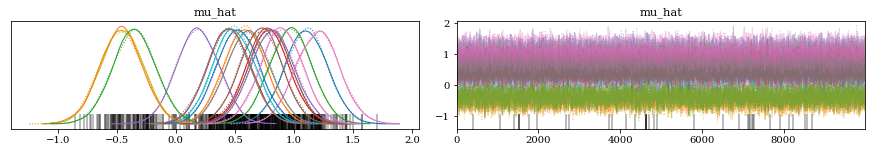

In [153]:
"""
Adjusted script from 
https://github.com/pymc-devs/pymc3/blob/master/pymc3/examples/rankdata_ordered.py 
"""

"""
Using Ordered transformation to model ranking data
inspired by the Stan implementation of Thurstonian model
see http://discourse.mc-stan.org/t/thurstonian-model/1735/5
also see related discussion on PyMC3 discourse:
https://discourse.pymc.io/t/order-statistics-in-pymc3/617
"""

considered_features = [ 'breathing_rate', 'average_resting_heart_rate', 'glucose']

#@model:m_t10 & trace_mt10
# transformed data
y_argsort = return_argsums_nonsummarized(overall_data)


# data
K = 19  # number of subjects being ranked
J = len(y_argsort)  # number of rows
yreal = overall_data.sort_values(by='ranking').ranking.unique()

with pm.Model() as m_t10:
    mu_hat = pm.Normal('mu_hat', 0, 1, shape=K-1)
    # set first value to 0 to avoid unidentified model
    mu = tt.concatenate([[0.], mu_hat])
    # sd = pm.HalfCauchy('sigma', 1.)
    latent = pm.Normal('latent',
               mu=mu[y_argsort],
               sigma=1.,  # using sd does not work yet
               transform=pm.distributions.transforms.ordered,
               shape=y_argsort.shape,
               testval=np.repeat(np.arange(K)[:,None], J, axis=1).T)
               # There are some problems using Ordered
               # right now, you need to specify testval


d1namo_thurstonian_order =  []

with m_t10:
    trace_m_t10 = pm.sample(10000)

    pm.traceplot(trace_m_t10, varnames=['mu_hat'])

#print('Example observed data: ')
#print(y[:30, :].T)
print('The true ranking is: ')
print(yreal.flatten())
print('The Latent mean is: ')
latentmu = np.hstack(([0], pm.summary(trace_m_t10, varnames=['mu_hat'])['mean'].values))
print(np.round(latentmu, 2))
print('The estimated ranking is: ')
print(np.argsort(latentmu))
print('Correlation:')
print(pd.Series(np.argsort(latentmu).tolist()).corr(pd.Series(yreal.tolist())))
d1namo_thurstonian_order.append( np.argsort(latentmu))
    

#10 min features with considered_features =  [ 'breathing_rate', 'average_resting_heart_rate', 'glucose']

In [ ]:
varnames = ['beta0', 'beta1', 'beta2', 'beta3','sigma']

forestplot(pooled_trace, var_names=varnames)
az.summary(pooled_trace, var_names = varnames)

In [154]:
considered_features = [ 'breathing_rate', 'average_resting_heart_rate', 'glucose']

#@model: mt_d,trace: trace_m_td --> names are changed manually prior to execution
# transformed data
y_argsort = return_argsums_daily_level(overall_data)

# data
K = 19  # number of subjects being ranked
J = len(y_argsort)  # number of rows
yreal = overall_data.sort_values(by='ranking').ranking.unique()

with pm.Model() as m_td:
    mu_hat = pm.Normal('mu_hat', 0, 1, shape=K-1)
    # set first value to 0 to avoid unidentified model
    mu = tt.concatenate([[0.], mu_hat])
    # sd = pm.HalfCauchy('sigma', 1.)
    latent = pm.Normal('latent',
               mu=mu[y_argsort],
               sigma=1.,  # using sd does not work yet
               transform=pm.distributions.transforms.ordered,
               shape=y_argsort.shape,
               testval=np.repeat(np.arange(K)[:,None], J, axis=1).T)
               # There are some problems using Ordered
               # right now, you need to specify testval


d1namo_thurstonian_order =  []

with m_td:
    trace_m_td = pm.sample(10000)

pm.traceplot(trace_m_td, varnames=['mu_hat'])

#print('Example observed data: ')
#print(y[:30, :].T)
print('The true ranking is: ')
print(yreal.flatten())
print('The Latent mean is: ')
latentmu = np.hstack(([0], pm.summary(trace_m_td, varnames=['mu_hat'])['mean'].values))
print(np.round(latentmu, 2))
print('The estimated ranking is: ')
print(np.argsort(latentmu))
print('Correlation:')
print(pd.Series(np.argsort(latentmu).tolist()).corr(pd.Series(yreal.tolist())))
d1namo_thurstonian_order.append( np.argsort(latentmu))
    



 ## results of day summarized results with [ 'breathing_rate', 'average_resting_heart_rate', 'glucose']

12
18


ValueError: Length of values does not match length of index